<a href="https://colab.research.google.com/github/Bits-Deep-Analytics/Predictive_analytics/blob/dev/Scripts/PCA_Python.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open this notebook in Colaboratory"/></a>

### Read the dataset

In [1]:
import pandas as pd
import numpy as np
from numpy import cov
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

In [2]:
houses = pd.read_csv('https://raw.githubusercontent.com/Bits-Deep-Analytics/Predictive_analytics/dev/Data/Houses/cadata.csv')
houses_z = StandardScaler().fit_transform(houses)

In [3]:
houses_z = pd.DataFrame(houses_z, columns = list(houses.columns))

In [4]:
display(houses_z.head(3))

,MHV,MINC,HAGE,ROOMS,BEDRM,POPN,HHLDS,LAT,LONG
0,2.129631,2.344766,0.982143,-0.804819,-0.970706,-0.974429,-0.977033,1.052548,-1.327835
1,1.314156,2.332238,-0.607019,2.045890,1.348649,0.861439,1.669961,1.043185,-1.322844
2,1.258693,1.782699,1.856182,-0.535746,-0.825895,-0.820777,-0.843637,1.038503,-1.332827


In [5]:
houses_t = houses_z['MHV']
houses_t = pd.DataFrame(houses_t)
houses_p = houses_z.drop('MHV',axis=1)
#print(type(houses_p))

In [6]:
display(houses.head(3))
display(houses_z.head(3))
display(houses_p.head(3))
display(houses_t.head(3))

,MHV,MINC,HAGE,ROOMS,BEDRM,POPN,HHLDS,LAT,LONG
0,452600,8.3252,41,880,129,322,126,37.88,-122.23
1,358500,8.3014,21,7099,1106,2401,1138,37.86,-122.22
2,352100,7.2574,52,1467,190,496,177,37.85,-122.24


,MHV,MINC,HAGE,ROOMS,BEDRM,POPN,HHLDS,LAT,LONG
0,2.129631,2.344766,0.982143,-0.804819,-0.970706,-0.974429,-0.977033,1.052548,-1.327835
1,1.314156,2.332238,-0.607019,2.045890,1.348649,0.861439,1.669961,1.043185,-1.322844
2,1.258693,1.782699,1.856182,-0.535746,-0.825895,-0.820777,-0.843637,1.038503,-1.332827


,MINC,HAGE,ROOMS,BEDRM,POPN,HHLDS,LAT,LONG
0,2.344766,0.982143,-0.804819,-0.970706,-0.974429,-0.977033,1.052548,-1.327835
1,2.332238,-0.607019,2.045890,1.348649,0.861439,1.669961,1.043185,-1.322844
2,1.782699,1.856182,-0.535746,-0.825895,-0.820777,-0.843637,1.038503,-1.332827


,MHV
0,2.129631
1,1.314156
2,1.258693


In [7]:
print(houses.shape)
print(houses_z.shape)
print(houses_p.shape)
print(houses_t.shape)

(20640, 9)
(20640, 9)
(20640, 8)
(20640, 1)


### Principal Component Analysis

In [8]:
cov_mat = cov(houses_p.T)
cov_mat = pd.DataFrame(cov_mat)
display(cov_mat)

,0,1,2,3,4,5,6,7
0,1.000048,-0.119040,0.198059,-0.008094,0.004835,0.013034,-0.079813,-0.015177
1,-0.119040,1.000048,-0.361280,-0.320500,-0.296259,-0.302931,0.011173,-0.108202
2,0.198059,-0.361280,1.000048,0.929938,0.857168,0.918529,-0.036101,0.044570
3,-0.008094,-0.320500,0.929938,1.000048,0.878068,0.979876,-0.066322,0.068381
4,0.004835,-0.296259,0.857168,0.878068,1.000048,0.907266,-0.108790,0.099778
5,0.013034,-0.302931,0.918529,0.979876,0.907266,1.000048,-0.071039,0.055313
6,-0.079813,0.011173,-0.036101,-0.066322,-0.108790,-0.071039,1.000048,-0.924709
7,-0.015177,-0.108202,0.044570,0.068381,0.099778,0.055313,-0.924709,1.000048


In [9]:
from scipy.linalg import eigh 
values, vectors = eigh(cov_mat,  lower=False)
print(vectors.shape)
print(values[::-1])
vectors = pd.DataFrame(vectors)
#display(vectors.reindex(index=vectors.index[::-1]))
vectors = vectors.T
vectors = vectors[::-1].T
vectors = vectors * -1
vectors = pd.DataFrame(vectors)
display(vectors)

(8, 8)
[3.90687152 1.90803984 1.0720134  0.82203844 0.14806184 0.08166817
 0.046902   0.01479241]


,7,6,5,4,3,2,1,0
0,0.045144,-0.035300,-0.890917,0.407819,-0.056214,-0.057215,-0.168838,0.041556
1,-0.218499,0.016026,0.393865,0.886341,0.034912,0.091479,-0.040843,0.003958
2,0.483771,0.074611,-0.093020,0.115204,0.317366,0.557980,0.550480,-0.152912
3,0.490501,0.060715,0.117157,0.063411,0.377399,-0.231004,-0.221091,0.702354
4,0.471968,0.026036,0.116248,0.082506,-0.848952,0.131099,-0.022262,0.133584
5,0.491718,0.063521,0.109440,0.096659,0.138694,-0.402963,-0.302347,-0.678107
6,-0.073022,0.701977,-0.012536,-0.098898,0.049269,0.464578,-0.521878,-0.036622
7,0.075641,-0.701256,0.055776,-0.069706,0.100433,0.477759,-0.503636,-0.050584


In [14]:
pca = decomposition.PCA()
pca.n_components = 2
pca_r = pca.fit_transform(houses_p)
print(pca_r)

[[-2.09184679  1.39656817]
 [ 2.94066231  1.93092362]
 [-1.96823768  1.46539958]
 ...
 [-0.44790199  1.81006869]
 [-0.85983106  1.7987357 ]
 [ 0.14053995  1.84517664]]


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


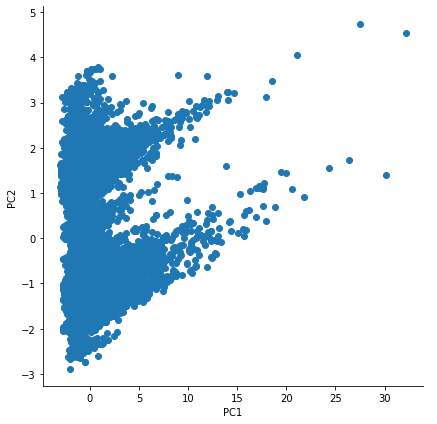

In [16]:
pca_df = pd.DataFrame(data=pca_r, columns=("PC1", "PC2"))
sn.FacetGrid(pca_df, size=6).map(plt.scatter, 'PC1', 'PC2').add_legend()
plt.show()

### Selection of Principal components

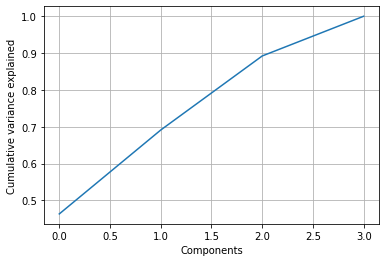

In [17]:
pca.n_components = 4
pca_r = pca.fit_transform(houses_z)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)
plt.plot(cum_var_explained)
plt.grid()
plt.xlabel('Components')
plt.ylabel('Cumulative variance explained')
plt.show()